<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/ClassifierLogistic_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("/content/sample_data/winequalitywhite.csv")

# Display the first few rows
print(data.head())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [ ]:
# Assuming 'quality' is the name of the target variable column
x = data.drop('quality', axis=1)  # Features: all columns except 'quality'
y = data['quality']  # Target variable: 'quality' column

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Added this line to split the data

In [ ]:
#-----------------------------------Initialise and train model for multiclass classification-------------------------------------------------
model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)
model.fit(x,  y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")



Accuracy: 0.5122448979591837
Confusion Matrix:
[[  0   0   2   2   0   1]
 [  0   0  13  12   0   0]
 [  0   0 151 137   3   0]
 [  1   0  88 321  22   0]
 [  0   0   9 153  30   0]
 [  0   0   1  23  11   0]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.57      0.52      0.54       291
           6       0.50      0.74      0.59       432
           7       0.45      0.16      0.23       192
           8       0.00      0.00      0.00        35

    accuracy                           0.51       980
   macro avg       0.25      0.24      0.23       980
weighted avg       0.48      0.51      0.47       980



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

When working with multiclass classification, you must specify the average parameter to define how the scores are computed across classes. Common options include:

average='micro':

Calculates metrics globally by considering all true positives, false positives, and false negatives.
average='macro':

Calculates metrics for each class independently, then averages them without considering class imbalance.
average='weighted':

Similar to macro, but weights the scores for each class by the number of true instances.
average=None:

Returns metrics for each class without averaging.

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

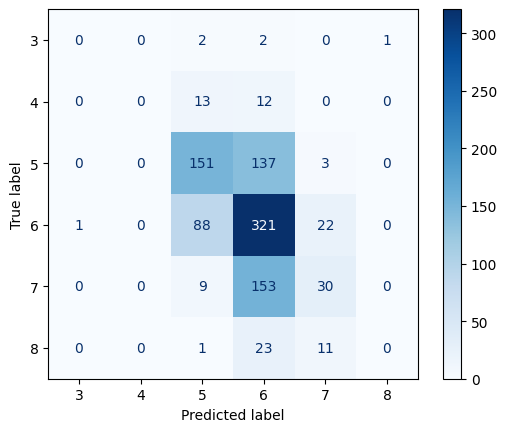

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

#--------------------------------Performance Metrics---------------------------------------------------
# The 'average' parameter needs to be specified for multiclass classification
# Options: 'micro', 'macro', 'weighted', 'samples'
# Choosing 'weighted' to account for class imbalances
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#------------------------------------------------------------------------------------------------------------------------------------
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.47726113172541745
Recall: 0.5122448979591837
F1 Score: 0.4691807232006568


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


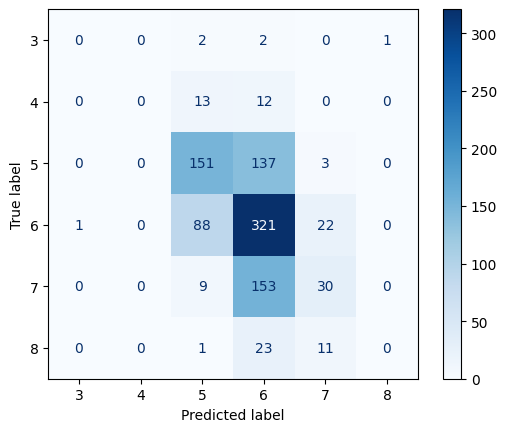

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.show()

Explanation of Changes:

Import label_binarize: This function is used to convert multiclass labels into a binary format suitable for roc_curve.
Binarize Labels: label_binarize is applied to both y_test and y_pred to create binary representations for each class.
Calculate ROC per Class: The code iterates through each class, calculating the ROC curve and AUC using the binarized labels.
Micro-Averaging (Optional): A micro-average ROC curve is calculated by considering all classes together.
Plotting: The code provides an example of plotting the micro-average ROC curve. You can adapt it to plot individual class curves or other variations as needed.

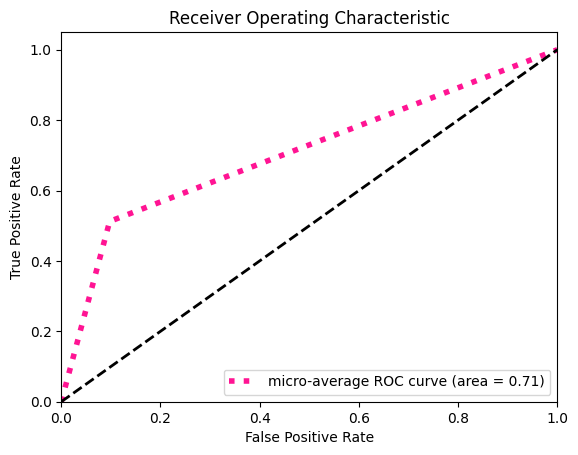

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

#----------------------------------------------------Compute ROC curve and AUC--------------------------------------------------
# Assuming y_test and y_pred are multiclass
n_classes = len(np.unique(y_test))  # Get the number of unique classes

# Binarize the output for multiclass ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class or micro-average
plt.figure()
# Example: Plotting micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# You can add plots for individual classes as needed
# ...

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [ ]:
#----------------------------------------------Generate Synthetic Binary Classification Data-------------------------------------
#-----------------------------Creating a dataset with 2 features and 2 classes for easy visualisation-----------------------------



   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  

Classification Report:
              precision    recall  f1-score   support

       

<ipython-input-1-5b8788de8edd>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].mode()[0], inplace=True)


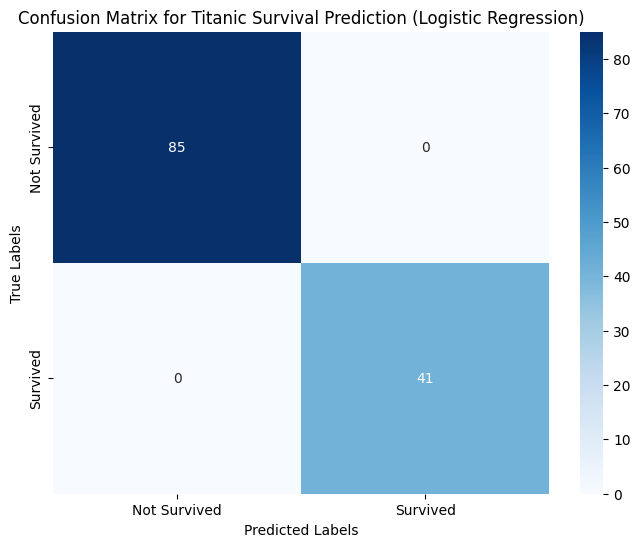

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Load Titanic dataset (ensure the 'train.csv' is in the same directory)
df = pd.read_csv("/content/sample_data/tested.csv")

# Display the first few rows of the dataset
print(df.head())

# Preprocessing: Fill missing values for simplicity
# Create an imputer to fill NaN values with the median for numerical features
imputer = SimpleImputer(strategy='median')

# Apply the imputer to the numerical features in your dataset
numerical_features = ['Age', 'Fare']  # List your numerical features
df[numerical_features] = imputer.fit_transform(df[numerical_features])

# Fill missing values for categorical features with the most frequent value
categorical_features = ['Embarked']  # List your categorical features
for feature in categorical_features:
    df[feature].fillna(df[feature].mode()[0], inplace=True)

# Convert categorical variables into numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Male: 0, Female: 1
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # Convert Embarked (C, Q, S) into numbers

# Select features (X) and target (y)
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]  # Features
y = df['Survived']  # Target variable (1: survived, 0: did not survive)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
clf = LogisticRegression(max_iter=5000, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix for Titanic Survival Prediction (Logistic Regression)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

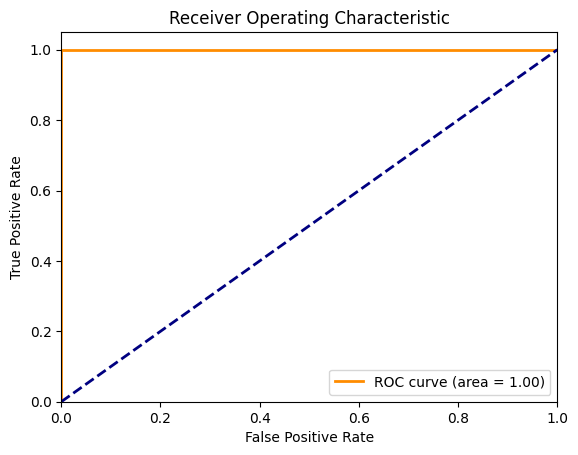

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# No need to import label_binarize for binary classification

# ... (previous code) ...

#----------------------------------------------------Compute ROC curve and AUC--------------------------------------------------
# Assuming y_test and y_pred are binary (0 and 1)
# No need to binarize for binary classification

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)  # Directly use y_test and y_pred
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Explanation of the Code:
Load Dataset:

We use the load_breast_cancer() function from sklearn.datasets to load the Breast Cancer dataset.
The dataset contains features like mean radius, mean texture, and others, which we convert into a pandas DataFrame.
Preprocessing:

The target variable (target) is added to the DataFrame.
We separate the features (X) and the target (y).
We scale the features using StandardScaler because logistic regression benefits from scaling, especially when the features have different units or magnitudes.
Model Training:

A Logistic Regression model is trained using the scaled training data (X_train_scaled and y_train).
Evaluation:

We make predictions on the test set (X_test_scaled).
A confusion matrix is computed to evaluate the model's performance.
The classification report is printed, which includes precision, recall, and F1 score for both the benign and malignant classes.
Visualization:

The confusion matrix is visualized using a heatmap for better interpretation.
Expected Output:
Confusion Matrix Heatmap: This will show the number of true positives, true negatives, false positives, and false negatives in the model’s predictions.
Classification Report: Provides detailed performance metrics like precision, recall, and F1 score for the malignant (1) and benign (0) classes.

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

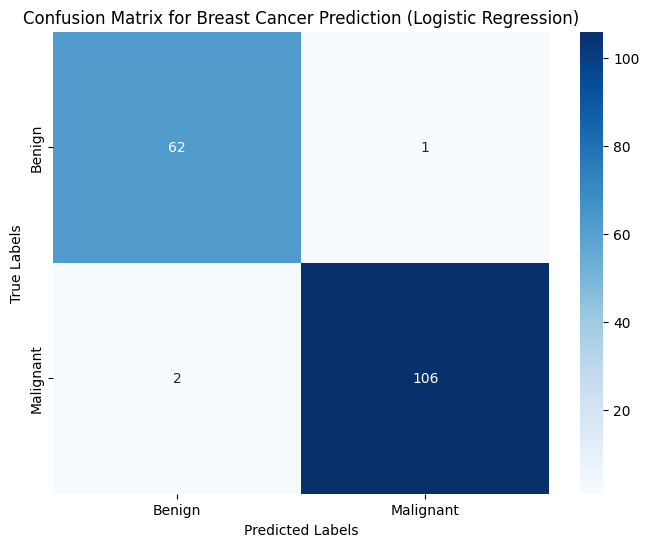

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset from sklearn
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

# Add the target (malignant/benign) to the DataFrame
df['target'] = cancer_data.target

# Display the first few rows of the dataset
print(df.head())

# Features (X) and target (y)
X = df.drop(columns=['target'])  # All columns except the target
y = df['target']  # Target column (0 = Benign, 1 = Malignant)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (Logistic Regression benefits from scaled features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
clf = LogisticRegression(max_iter=5000, random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Breast Cancer Prediction (Logistic Regression)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


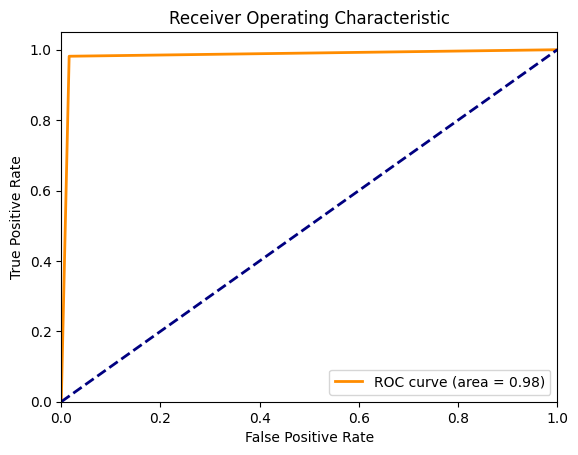

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# No need to import label_binarize for binary classification

# ... (previous code) ...

#----------------------------------------------------Compute ROC curve and AUC--------------------------------------------------
# Assuming y_test and y_pred are binary (0 and 1)
# No need to binarize for binary classification

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)  # Directly use y_test and y_pred
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score,ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [ ]:
# Load the Breast Cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

In [ ]:
df['target'] = cancer_data.target

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score,ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
# Import the make_classification function
from sklearn.datasets import make_classification # This line was missing


# Now you can use make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.88

In [ ]:
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score


In [ ]:
X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(X_min, X_max, 0.1), np.arange(y_min, y_max, 0.1))

In [ ]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

<ipython-input-45-7bdf43f70927>:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='x',edgecolor='k',label='Training data')


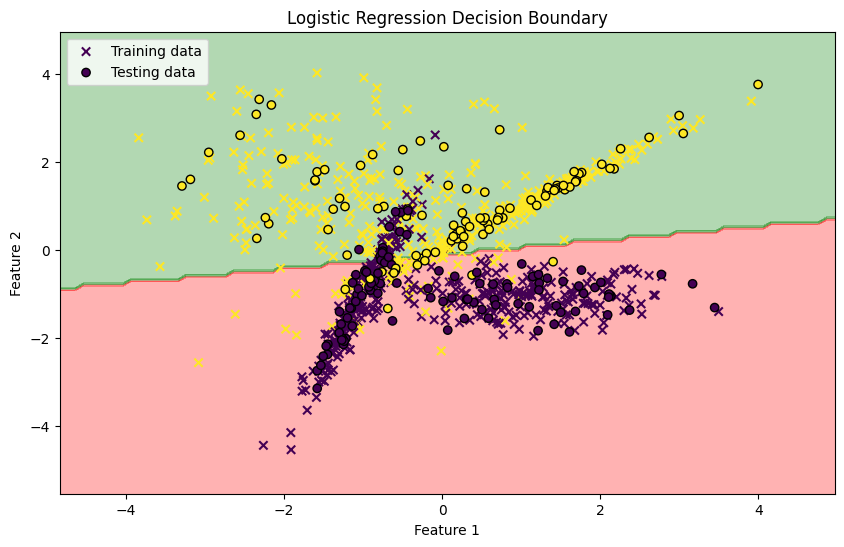

In [ ]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3,cmap=ListedColormap(['red', 'green']))
# Corrected the scatter plot for training data to use X_train for both x and y coordinates
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='x',edgecolor='k',label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o',edgecolor='k',label='Testing data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

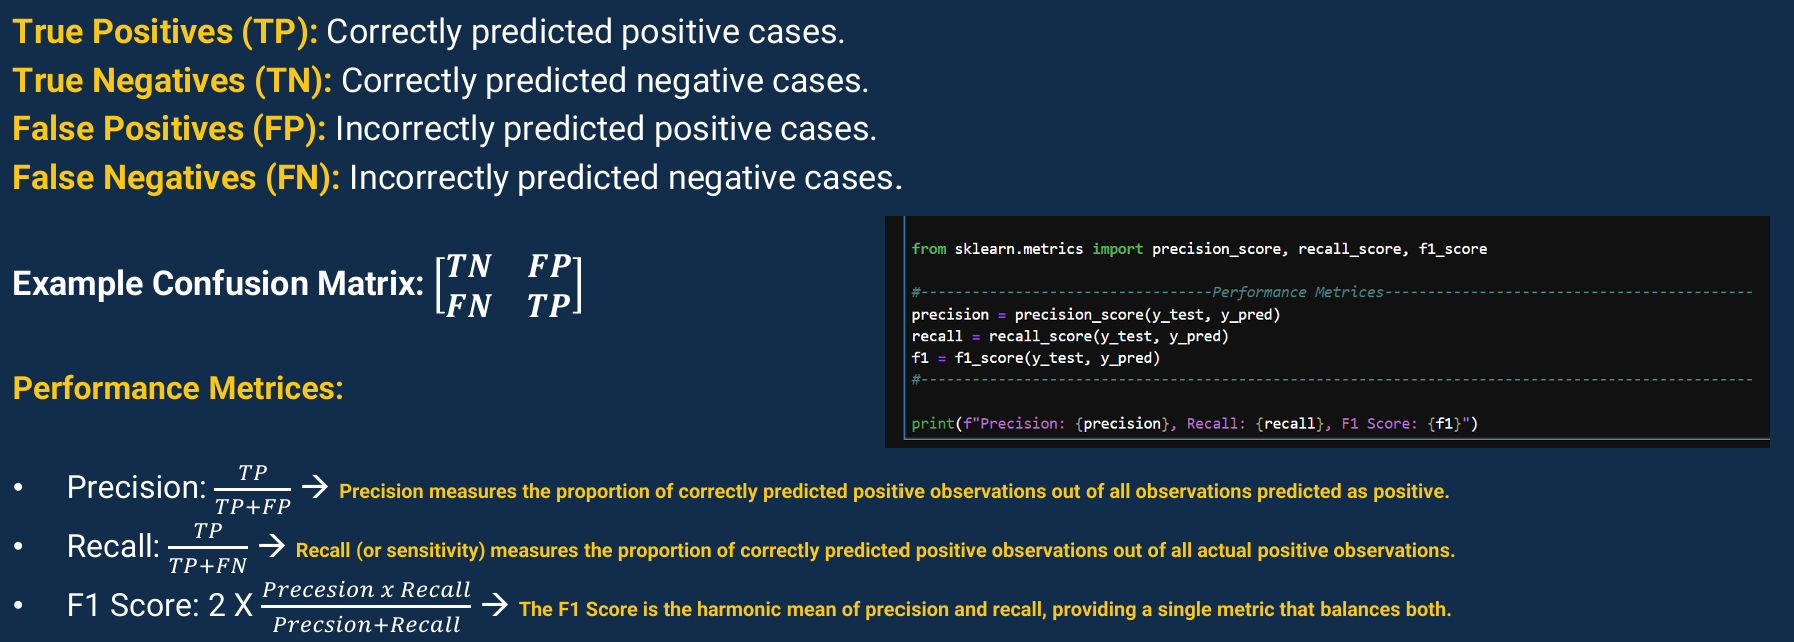


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       101
           1       0.88      0.88      0.88        99

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



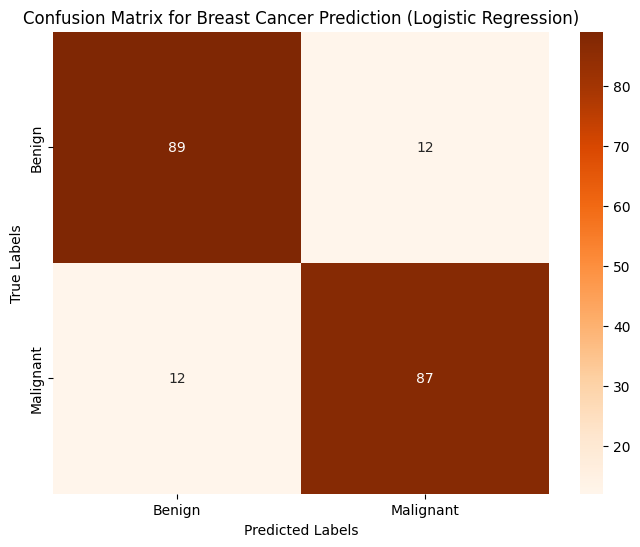

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Breast Cancer Prediction (Logistic Regression)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


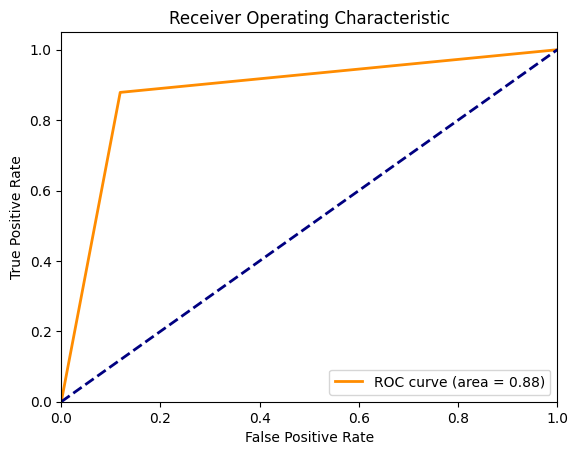

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# No need to import label_binarize for binary classification

# ... (previous code) ...

#----------------------------------------------------Compute ROC curve and AUC--------------------------------------------------
# Assuming y_test and y_pred are binary (0 and 1)
# No need to binarize for binary classification

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)  # Directly use y_test and y_pred
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The difference between regularization in binary logistic regression and multiclass logistic regression lies in how the penalty is applied and the nature of the problem being addressed. While the concept of regularization (controlling model complexity and preventing overfitting) remains the same, the specific implementation can vary depending on the type of logistic regression. Let’s dive deeper:

1. Regularization in Logistic Regression (Binary Classification):
Binary logistic regression deals with a binary target variable (e.g., 0 or 1, spam or not spam, etc.).

Regularization in this context helps to reduce overfitting by penalizing large coefficients in the model.

The two most common types of regularization in binary logistic regression are:

L1 Regularization (Lasso): Adds the absolute values of the coefficients to the loss function (
𝜆
∑
∣
𝑤
𝑖
∣
λ∑∣w
i
​
 ∣).
Encourages sparsity (some coefficients become zero), leading to feature selection.
L2 Regularization (Ridge): Adds the squared values of the coefficients to the loss function (
𝜆
∑
𝑤
𝑖
2
λ∑w
i
2
​
 ).
Encourages smaller coefficient magnitudes but does not set any coefficients to zero.
The loss function (penalized negative log-likelihood) with regularization becomes:

𝐽
(
𝑤
)
=
−
1
𝑁
∑
𝑖
=
1
𝑁
[
𝑦
𝑖
log
⁡
𝑦
^
𝑖
+
(
1
−
𝑦
𝑖
)
log
⁡
(
1
−
𝑦
^
𝑖
)
]
+
𝜆
𝑅
(
𝑤
)
J(w)=−
N
1
​
  
i=1
∑
N
​
 [y
i
​
 log
y
^
​
  
i
​
 +(1−y
i
​
 )log(1−
y
^
​
  
i
​
 )]+λR(w)
where
𝑅
(
𝑤
)
R(w) is the regularization term, either
𝐿
1
L1 or
𝐿
2
L2.

2. Regularization in Multiclass Logistic Regression:
Multiclass logistic regression extends binary logistic regression to problems with more than two classes (e.g., predicting a class from {A, B, C}).

Instead of modeling a single decision boundary (as in binary logistic regression), it learns multiple decision boundaries simultaneously (e.g., one vs. all or using a softmax function for direct multiclass classification).

Regularization in Multiclass Logistic Regression:

Still applies penalties to the coefficients, but it now operates on all the coefficients corresponding to all classes.
When using the softmax function (common for multiclass problems), the model calculates probabilities for all classes and applies regularization across all weight vectors.
Key Differences:
In binary logistic regression, there is one set of weights (coefficients) to regularize.
In multiclass logistic regression, regularization applies to multiple sets of weights—one for each class (in softmax) or multiple binary classifiers (in one-vs-rest).
Loss Function in Multiclass Logistic Regression with Regularization:
The loss function becomes the regularized cross-entropy loss:
𝐽
(
𝑊
)
=
−
1
𝑁
∑
𝑖
=
1
𝑁
∑
𝑘
=
1
𝐾
𝑦
𝑖
𝑘
log
⁡
𝑦
^
𝑖
𝑘
+
𝜆
𝑅
(
𝑊
)
J(W)=−
N
1
​
  
i=1
∑
N
​
  
k=1
∑
K
​
 y
ik
​
 log
y
^
​
  
ik
​
 +λR(W)
where: -
𝑊
W is the matrix of weights, with each row corresponding to the weights for a specific class. -
𝑦
𝑖
𝑘
y
ik
​
  is the binary indicator (1 if sample
𝑖
i belongs to class
𝑘
k, 0 otherwise). -
𝑦
^
𝑖
𝑘
y
^
​
  
ik
​
  is the predicted probability for sample
𝑖
i belonging to class
𝑘
k.

One-vs-Rest (OvR) vs. Softmax:
One-vs-Rest: For
𝐾
K classes,
𝐾
K binary logistic regression models are trained. Each model has its own regularization term.
Softmax: Regularization applies to the weight matrix
𝑊
W for all classes collectively.

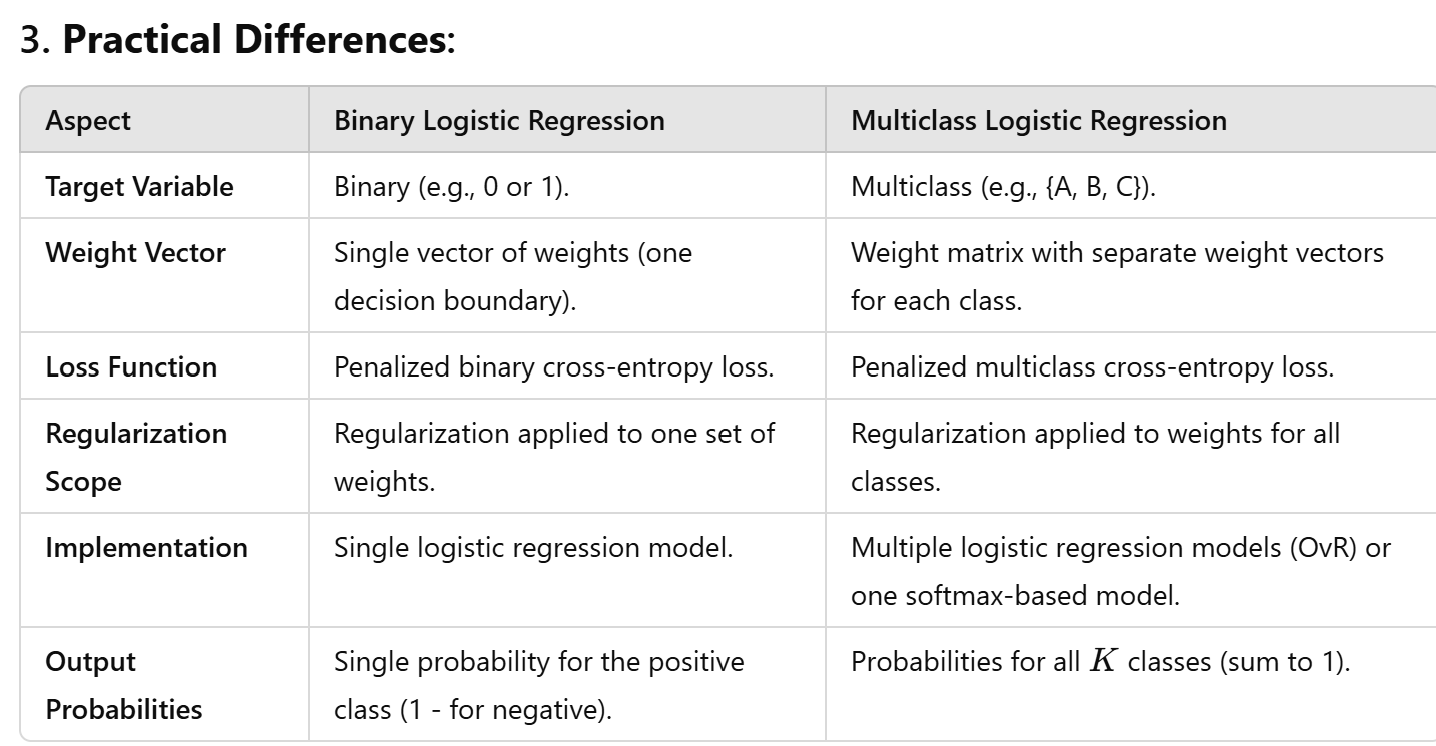

Key Considerations in Regularization for Multiclass:
Penalty Strength (
𝜆
λ):
The penalty term (
𝜆
λ) is applied to all weight vectors. A higher value makes the model simpler and less prone to overfitting, but too high a value can lead to underfitting.
Multinomial vs. One-vs-Rest:
When using the multinomial (softmax) strategy, the regularization term applies collectively to the weight matrix.
When using the One-vs-Rest strategy, regularization is applied separately to each of the binary classifiers.


Example Code: Binary vs. Multiclass Logistic Regression with Regularization
Binary Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate binary classification dataset
X, y = make_classification(n_samples=500, n_features=10, n_classes=2, random_state=42)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression with L2 Regularization
clf_binary = LogisticRegression(penalty='l2', C=1.0, random_state=42)
clf_binary.fit(X_train, y_train)

print("Binary Logistic Regression Score:", clf_binary.score(X_test, y_test))


Binary Logistic Regression Score: 0.8666666666666667


Multiclass Logistic Regression

In [ ]:
from sklearn.datasets import make_classification

# Generate multiclass dataset
X, y = make_classification(n_samples=500, n_features=10, n_classes=3, n_informative=5, random_state=42)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Multiclass Logistic Regression with Softmax
clf_multiclass = LogisticRegression(multi_class='multinomial', penalty='l2', C=1.0, solver='lbfgs', random_state=42)
clf_multiclass.fit(X_train, y_train)

print("Multiclass Logistic Regression Score:", clf_multiclass.score(X_test, y_test))


Multiclass Logistic Regression Score: 0.7


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


- Regularization in binary logistic regression focuses on a single
weight vector, whereas in multiclass logistic regression, it applies to all weight vectors across multiple classes.
- Both use L1 or L2 penalties to prevent overfitting, but multiclass logistic regression often requires strategies like softmax or One-vs-Rest.
- When dealing with multiclass problems, regularization penalties need to account for the added complexity of managing multiple decision boundaries.







## RandomForest Model

In [ ]:
# Check for missing values
print(data.isnull().sum())  # No missing values in this dataset

# Handle outliers (optional, based on domain knowledge)
# Example: Remove wines with extreme residual sugar levels
data = data[data['residual sugar'] < data['residual sugar'].quantile(0.99)]


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# Features (X) and target (y)
X = data.drop(columns=['quality'])
y = data['quality']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data (assuming `wine_data` is your DataFrame)
X = data.drop(columns=['quality'])  # Features
Y = data['quality']                 # Target

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, Y_train)

# Predict on the testing data
Y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.34689701030927833
R-squared (R²): 0.5305156245280279


In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = pd.read_csv(url, sep=";")

# Inspect the dataset
print(data.head())

# Convert target to binary for classification
# Threshold: Quality >= 6 -> Good (1), otherwise Bad (0)
data['quality_binary'] = (data['quality'] >= 6).astype(int)

# Features (X) and target (y)
X = data.drop(['quality', 'quality_binary'], axis=1)
y = data['quality_binary']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

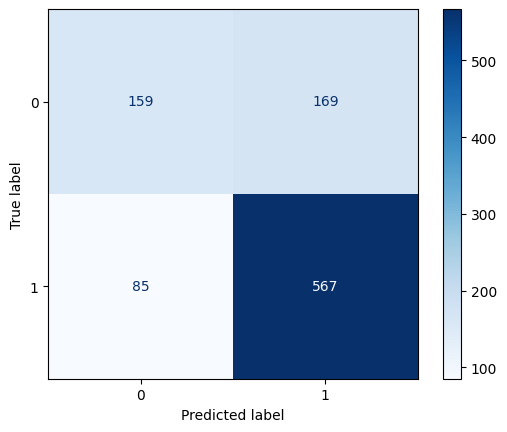

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 0.1}


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'C': 0.1, 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression

# Increase max_iter
logreg = LogisticRegression(max_iter=1000, C=0.1, solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)
print("Best Parameters:", logreg)


Best Parameters: LogisticRegression(C=0.1, max_iter=1000, random_state=42, solver='liblinear')


##**Use** a Different Solver
The solver determines the algorithm used for optimization. Some solvers are better suited for specific types of data:

liblinear: Good for small datasets and one-vs-rest classification.
lbfgs: Handles multiclass classification well.
saga: Supports large datasets and sparse features.
Try switching to a different solver such as 'lbfgs' or 'saga':




In [ ]:
logreg = LogisticRegression(max_iter=1000, C=0.1, solver='lbfgs', random_state=42)
logreg.fit(X_train, y_train)
print("Best Parameters:", logreg)

Best Parameters: LogisticRegression(C=0.1, max_iter=1000, random_state=42)


In [ ]:
logreg = LogisticRegression(max_iter=1000, C=0.1, solver='saga', random_state=42)
logreg.fit(X_train, y_train)
print("Best Parameters:", logreg)

Best Parameters: LogisticRegression(C=0.1, max_iter=1000, random_state=42, solver='saga')


#**Tune** Regularization Parameter (C)
The parameter C controls the strength of regularization:

Smaller C values increase regularization, which can help prevent overfitting but may cause convergence issues.
Larger C values reduce regularization and give the model more flexibility but may overfit.
You can tune C through GridSearchCV to find a value that avoids convergence problems:

python
Copy code


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 0.1, 'solver': 'liblinear'}


# Ensemble Method

#Ensemble methods like Random Forest or Gradient Boosting outperform Logistic  Regression for many datasets

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.77      0.73      0.75       328
           1       0.87      0.89      0.88       652

    accuracy                           0.84       980
   macro avg       0.82      0.81      0.81       980
weighted avg       0.83      0.84      0.84       980



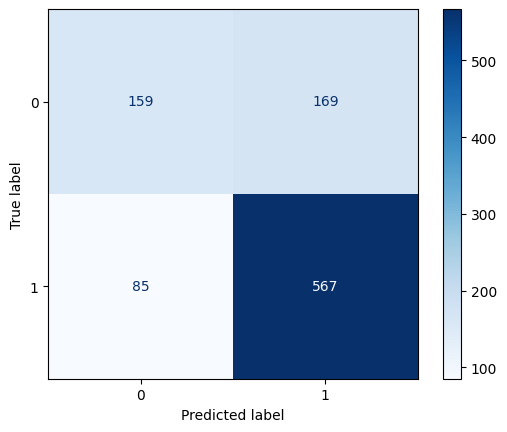

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.show()

In [ ]:
import numpy as np
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
for idx in sorted_indices:
    print(f"{X.columns[idx]}: {importances[idx]:.4f}")


alcohol: 0.1470
volatile acidity: 0.1203
density: 0.1102
free sulfur dioxide: 0.0945
total sulfur dioxide: 0.0834
residual sugar: 0.0810
chlorides: 0.0803
citric acid: 0.0799
pH: 0.0712
fixed acidity: 0.0675
sulphates: 0.0647


# Deep Evaluation

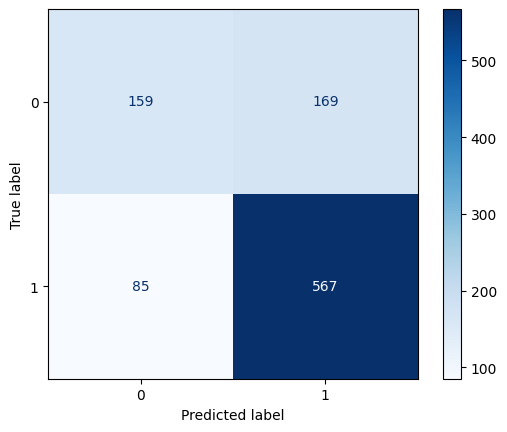

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()


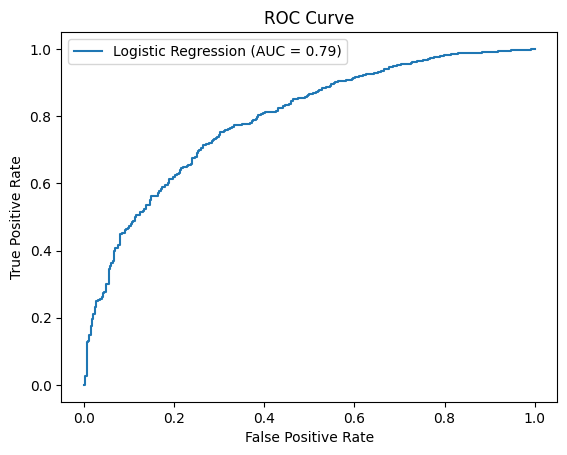

In [ ]:
from sklearn.metrics import roc_curve, auc

y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


#import Required Libraries
You need PolynomialFeatures to generate the polynomial combinations.



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Load and Split the Dataset
Assume you’ve already loaded the wine dataset into a DataFrame. Define your features (X) and target (y), then split into training and test sets.




In [ ]:
# Define X and y
X = data.drop('quality', axis=1)  # Features
y = (data['quality'] >= 6).astype(int)  # Convert quality to binary (e.g., good wine vs. bad wine)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Add Polynomial Features
Use the PolynomialFeatures class to generate polynomial terms.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create a PolynomialFeatures object
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the training and test data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Display the new shape of the feature matrix
print("Original feature count:", X_train.shape[1])
print("Polynomial feature count:", X_train_poly.shape[1])


Original feature count: 12
Polynomial feature count: 90


Parameters in PolynomialFeatures:
degree: Controls the highest degree of polynomial terms (e.g., 2 for squares, 3 for cubes).
include_bias: If True, it adds a column of ones (bias term). It’s often set to False since most models include this by default.


Scale the Features
Polynomial features tend to produce very large values, which can negatively affect many models. Standardize the data using StandardScaler.

In [ ]:
scaler = StandardScaler()

# Scale the polynomial features
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)


Train a Model with the Polynomial Features
You can now use these polynomial features to train a Logistic Regression model or another machine learning algorithm.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train a logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_poly_scaled, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test_poly_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00       659

    accuracy                           1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980



 Optional: Feature Names
If you want to see the names of the polynomial features (for interpretability), you can use the get_feature_names_out() method.

In [ ]:
feature_names = poly.get_feature_names_out(input_features=X.columns)
print("Polynomial Feature Names:", feature_names)


Polynomial Feature Names: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality_binary' 'fixed acidity^2'
 'fixed acidity volatile acidity' 'fixed acidity citric acid'
 'fixed acidity residual sugar' 'fixed acidity chlorides'
 'fixed acidity free sulfur dioxide' 'fixed acidity total sulfur dioxide'
 'fixed acidity density' 'fixed acidity pH' 'fixed acidity sulphates'
 'fixed acidity alcohol' 'fixed acidity quality_binary'
 'volatile acidity^2' 'volatile acidity citric acid'
 'volatile acidity residual sugar' 'volatile acidity chlorides'
 'volatile acidity free sulfur dioxide'
 'volatile acidity total sulfur dioxide' 'volatile acidity density'
 'volatile acidity pH' 'volatile acidity sulphates'
 'volatile acidity alcohol' 'volatile acidity quality_binary'
 'citric acid^2' 'citric acid residual sugar' 'citric acid chlorides'
 'citric acid free sulfur dioxide' 'citric acid

or example, with degree=2, a feature like alcohol would generate:

alcohol (original feature)
alcohol^2 (squared feature)
Interactions like alcohol * pH


Visualization of Results
To assess the impact of polynomial features:

Compare the model performance before and after adding polynomial features.
Use techniques like SHAP or feature importance for interpretability.
Advantages and Disadvantages
Advantages:
Captures non-linear relationships between features and the target variable.
Improves model accuracy for complex datasets.
Disadvantages:
Increases the dimensionality of the dataset, which may lead to overfitting.
More computationally expensive, especially for higher-degree polynomials.
By adding polynomial features, you might discover previously hidden relationships in the dataset that can improve prediction performance.

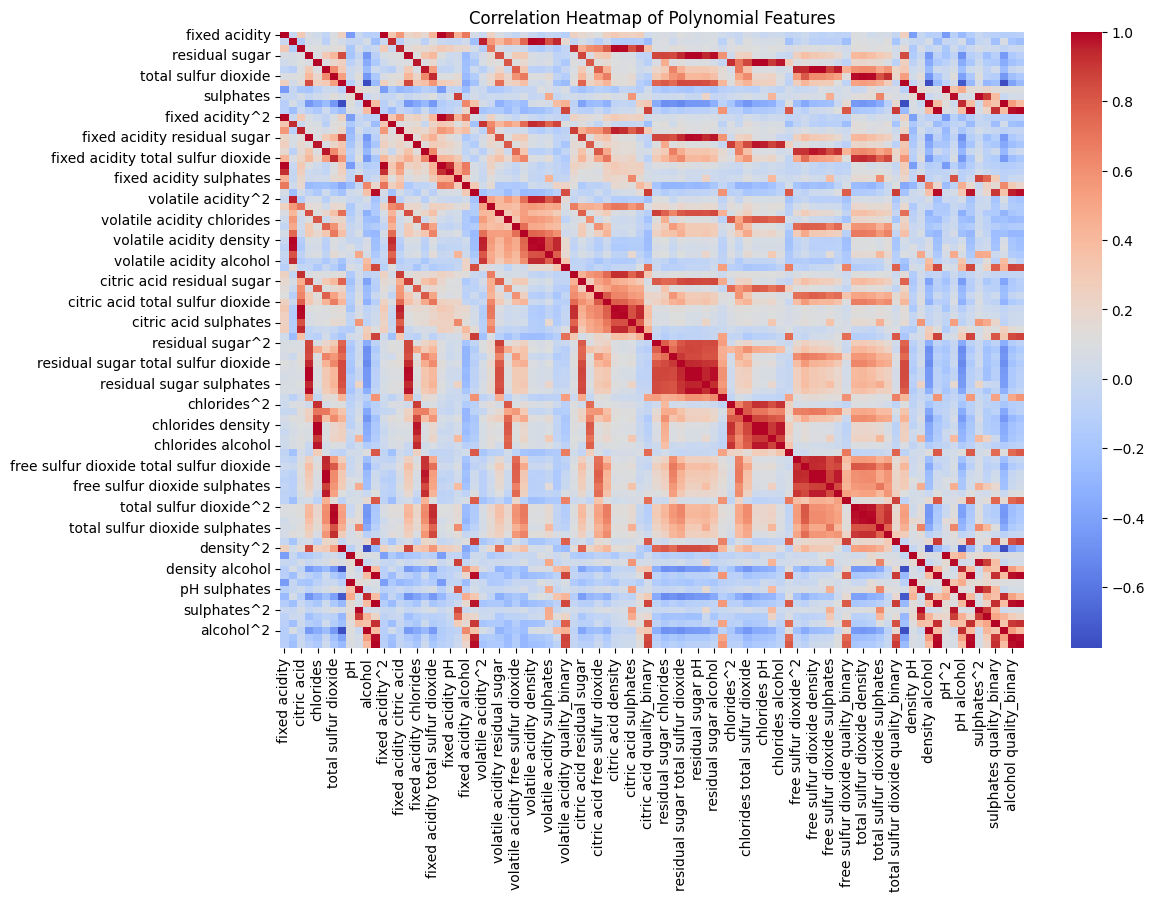

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for polynomial features
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out(X.columns))

# Plot pairwise correlations of selected features
plt.figure(figsize=(12, 8))
sns.heatmap(X_train_poly_df.corr(), cmap="coolwarm", annot=False, cbar=True)
plt.title("Correlation Heatmap of Polynomial Features")
plt.show()


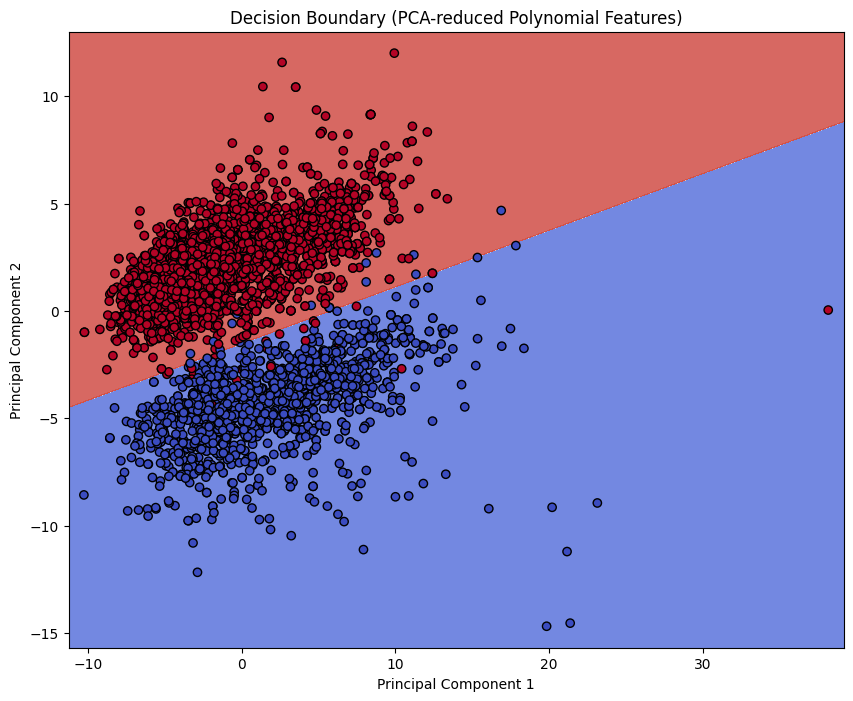

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Reduce dimensionality of the dataset to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_poly_scaled)
X_test_pca = pca.transform(X_test_poly_scaled)

# Train the model on reduced data
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_pca, y_train)

# Create a mesh grid for decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on the grid
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', cmap='coolwarm')
plt.title("Decision Boundary (PCA-reduced Polynomial Features)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a pipeline with PolynomialFeatures and LinearRegression
# Polynomial degree 2
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Regression (degree 2) R^2:", r2_poly)


Polynomial Regression (degree 2) R^2: 1.0


In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression R^2:", r2_linear)


Linear Regression R^2: 0.6695836677785919


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest R^2:", r2_rf)


Random Forest R^2: 0.7966696710423714


In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost R^2:", r2_xgb)


XGBoost R^2: 0.7896866798400879


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor


In [ ]:
# Models
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (degree 2)": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Store results
results = {}
predictions = {}


In [ ]:
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    # Evaluation
    r2 = r2_score(y_test, y_pred)
    results[name] = r2

# Print R^2 Scores
for name, r2 in results.items():
    print(f"{name}: R^2 = {r2:.4f}")


Linear Regression: R^2 = 0.6696
Polynomial Regression (degree 2): R^2 = 0.6913
Random Forest: R^2 = 0.7967
XGBoost: R^2 = 0.7897


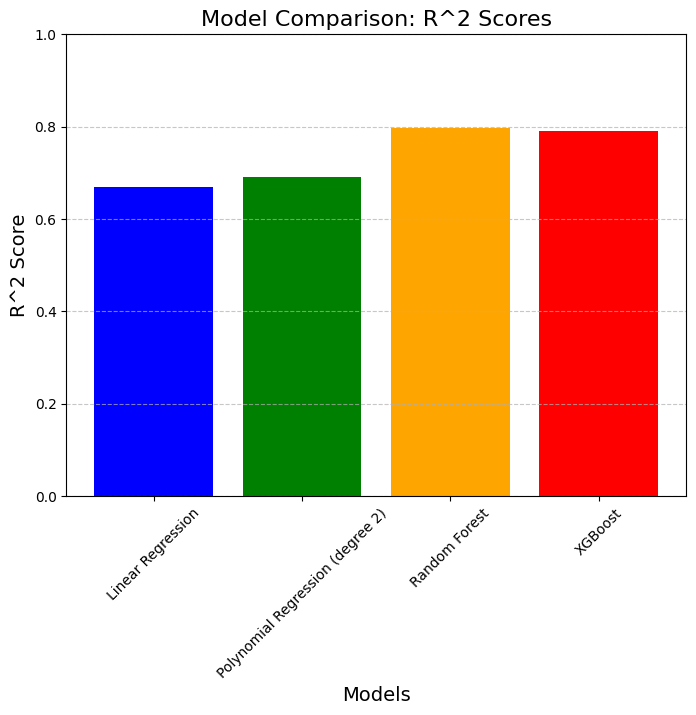

In [ ]:
# Bar plot of R^2 scores
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange', 'red'])
plt.title("Model Comparison: R^2 Scores", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("R^2 Score", fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Assuming the models have non-negative R^2
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


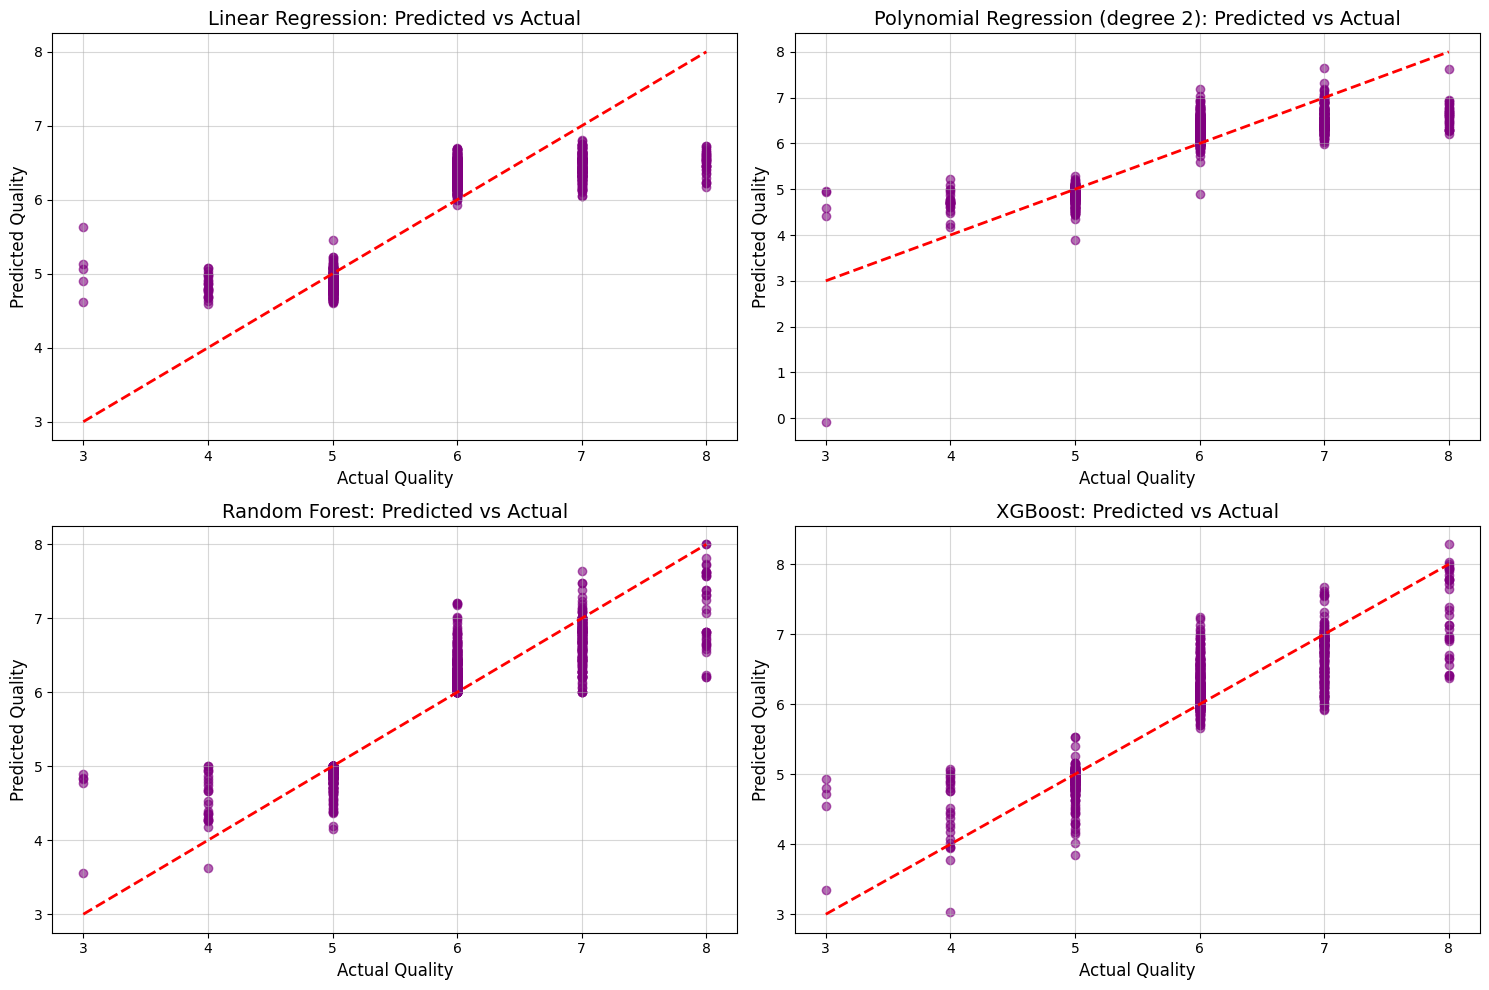

In [ ]:
# Scatter plots for each model
plt.figure(figsize=(15, 10))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f"{name}: Predicted vs Actual", fontsize=14)
    plt.xlabel("Actual Quality", fontsize=12)
    plt.ylabel("Predicted Quality", fontsize=12)
    plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Separate features and target
X = data.drop("quality", axis=1)
y = data["quality"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features (SVR is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model
svr = SVR(kernel='rbf', C=0.9, epsilon=0.2)
svr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svr.predict(X_test_scaled)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 0.23
R² Score: 0.70


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predictions
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluation
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.67      0.20      0.31        40
           5       0.92      0.99      0.95       426
           6       0.82      0.93      0.87       668
           7       0.71      0.55      0.62       280
           8       0.78      0.37      0.50        49

    accuracy                           0.83      1470
   macro avg       0.65      0.51      0.54      1470
weighted avg       0.82      0.83      0.82      1470

Accuracy Score: 0.8326530612244898


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predictions
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluation
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.67      0.20      0.31        40
           5       0.92      0.99      0.95       426
           6       0.82      0.93      0.87       668
           7       0.71      0.55      0.62       280
           8       0.78      0.37      0.50        49

    accuracy                           0.83      1470
   macro avg       0.65      0.51      0.54      1470
weighted avg       0.82      0.83      0.82      1470

Accuracy Score: 0.8326530612244898


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import r2_score
print(f"Best R² Score: {r2_score(y_test, y_pred):.4f}")


Best R² Score: 0.7841


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {scores}")
print(f"Mean R² Score: {scores.mean():.4f}")


Cross-validated R² scores: [0.68253574 0.67315558 0.71861828 0.64488573 0.62170846]
Mean R² Score: 0.6682


In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_importances)


quality_binary          0.643833
alcohol                 0.058456
free sulfur dioxide     0.042154
volatile acidity        0.033430
sulphates               0.029327
pH                      0.028915
total sulfur dioxide    0.028487
fixed acidity           0.028065
chlorides               0.027741
residual sugar          0.027400
citric acid             0.026927
density                 0.025265
dtype: float64


Summary
To get the best R² score possible for the Wine Quality (white) dataset:

Preprocess the data: Handle missing values, scale features, and remove outliers.
Choose the right model: Try models like Random Forest, XGBoost, or SVR.
Tune hyperparameters: Use GridSearchCV or RandomizedSearchCV for optimal hyperparameter settings.
Cross-validation: Use cross-validation to get a more reliable R² score.
Feature selection: Drop irrelevant or highly correlated features to improve model performance.
But remember, while R² scores near 1 are desirable, achieving a perfect R² score of 1.0 is rare and usually indicates overfitting.

<Axes: >

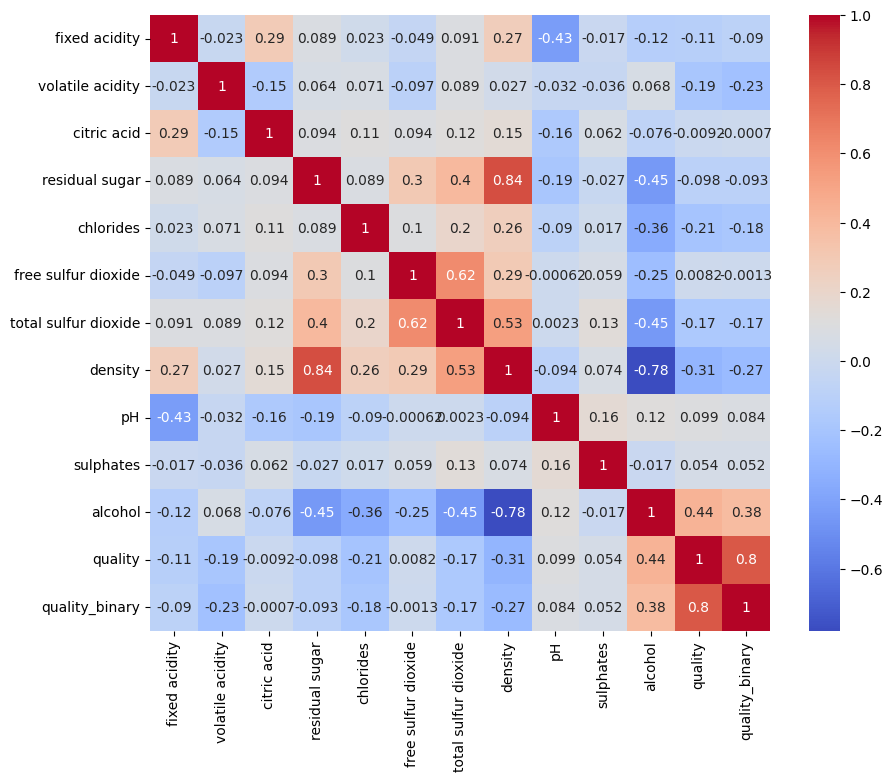

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)
importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importance)


quality_binary          0.643806
alcohol                 0.060062
free sulfur dioxide     0.039874
volatile acidity        0.032825
pH                      0.030504
residual sugar          0.029544
sulphates               0.028752
fixed acidity           0.028460
total sulfur dioxide    0.028439
chlorides               0.026858
density                 0.026245
citric acid             0.024631
dtype: float64


In [ ]:
import pandas as pd

# Load the wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine_data = pd.read_csv(url, sep=";")

# Filter the dataset to keep only rows where the quality is 8 or 9
wine_filtered = wine_data[wine_data['quality'].isin([8, 9])]

# Display the filtered dataset
print(wine_filtered.head())
print(f"Number of samples with quality 8 or 9: {wine_filtered.shape[0]}")


    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
17            6.2              0.66         0.48             1.2      0.029   
20            6.2              0.66         0.48             1.2      0.029   
22            6.8              0.26         0.42             1.7      0.049   
68            6.7              0.23         0.31             2.1      0.046   
74            6.7              0.23         0.31             2.1      0.046   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
17                 29.0                  75.0   0.9892  3.33       0.39   
20                 29.0                  75.0   0.9892  3.33       0.39   
22                 41.0                 122.0   0.9930  3.47       0.48   
68                 30.0                  96.0   0.9926  3.33       0.64   
74                 30.0                  96.0   0.9926  3.33       0.64   

    alcohol  quality  
17     12.8        8  
20     12.8        8  
22   

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import r2_score
print(f"Best R² Score: {r2_score(y_test, y_pred):.4f}")


Best R² Score: 0.7841


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {scores}")
print(f"Mean R² Score: {scores.mean():.4f}")


Cross-validated R² scores: [0.68253574 0.67315558 0.71861828 0.64488573 0.62170846]
Mean R² Score: 0.6682


In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_importances)


quality_binary          0.643833
alcohol                 0.058456
free sulfur dioxide     0.042154
volatile acidity        0.033430
sulphates               0.029327
pH                      0.028915
total sulfur dioxide    0.028487
fixed acidity           0.028065
chlorides               0.027741
residual sugar          0.027400
citric acid             0.026927
density                 0.025265
dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load the dataset and prepare features
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Set up GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}

rf = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
print(f"Test R² Score: {r2:.4f}")


Test R² Score: 0.5253


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

# Load the wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine_data = pd.read_csv(url, sep=";")

# Features and target
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. **Scaling Features** for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. **Support Vector Regression (SVR)** with RBF kernel
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

# 3. **Random Forest Regressor**
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# 4. **Predicting using both models**
y_pred_svr = svr.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)

# 5. **Model Evaluation**

# R² score
r2_svr = r2_score(y_test, y_pred_svr)
r2_rf = r2_score(y_test, y_pred_rf)

# Mean Absolute Error (MAE)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Mean Squared Error (MSE)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Cross-validation scores (to get a better idea of model robustness)
cv_svr = cross_val_score(svr, X_train_scaled, y_train, cv=5, scoring='r2')
cv_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')

# Print Evaluation Metrics
print("Support Vector Regression (SVR) Performance:")
print(f"R² Score: {r2_svr:.4f}")
print(f"MAE: {mae_svr:.4f}")
print(f"MSE: {mse_svr:.4f}")
print(f"Cross-validated R² Score: {cv_svr.mean():.4f}")
print("\nRandom Forest Regressor Performance:")
print(f"R² Score: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"Cross-validated R² Score: {cv_rf.mean():.4f}")

# Hyperparameter tuning for Random Forest (Optional for better performance)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

# GridSearch for Random Forest Regressor
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)

# R² score for tuned Random Forest
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
print("\nTuned Random Forest Regressor Performance:")
print(f"R² Score: {r2_rf_tuned:.4f}")


Support Vector Regression (SVR) Performance:
R² Score: 0.3717
MAE: 0.5150
MSE: 0.4744
Cross-validated R² Score: 0.3839

Random Forest Regressor Performance:
R² Score: 0.5261
MAE: 0.4261
MSE: 0.3578
Cross-validated R² Score: 0.4700

Tuned Random Forest Regressor Performance:
R² Score: 0.5286


In [ ]:
# Cross-validation for SVR
cv_svr = cross_val_score(best_svr, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"SVR Cross-validated R² Score: {cv_svr.mean():.4f}")

# Cross-validation for Random Forest
cv_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
print(f"Random Forest Cross-validated R² Score: {cv_rf.mean():.4f}")


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Define base models for stacking
estimators = [
    ('svr', best_svr),
    ('rf', best_rf)
]

# Use a linear regression model as the meta-model
stacked_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

# Train the stacking model
stacked_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_stacked = stacked_model.predict(X_test_scaled)
print(f"Stacking Regressor R² Score: {r2_score(y_test, y_pred_stacked):.4f}")


In [ ]:
# Feature importance using Random Forest
importances = best_rf.feature_importances_
indices = importances.argsort()[::-1]

# Plot feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# You can drop less important features based on this analysis.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine_data = pd.read_csv(url, sep=";")

# Features and target
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVR hyperparameter tuning
param_grid_svr = {
    'C': [1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf', 'poly']
}
svr = SVR()
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='r2')
grid_search_svr.fit(X_train_scaled, y_train)

best_svr = grid_search_svr.best_estimator_
y_pred_svr = best_svr.predict(X_test_scaled)

# Random Forest hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Stacking Regressor (ensemble model)
estimators = [('svr', best_svr), ('rf', best_rf)]
stacked_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacked_model.fit(X_train_scaled, y_train)
y_pred_stacked = stacked_model.predict(X_test_scaled)

# Evaluate models
print(f"SVR R² Score: {r2_score(y_test, y):.4f}")
print(f"Random Forest R² Score: {r2_score(y_test, y_pred_rf):.4f}")
